In [1]:
from appgeopy import *
from my_packages import *

#### Case 1

Note: Calculating the monthly average directly from a differenced time series (e.g., displacement values) is incorrect.  This is because averaging the differenced data removes crucial variations within the time series.  Consequently, when you cumulatively sum these averaged differences to reconstruct the original signal, you lose significant information.

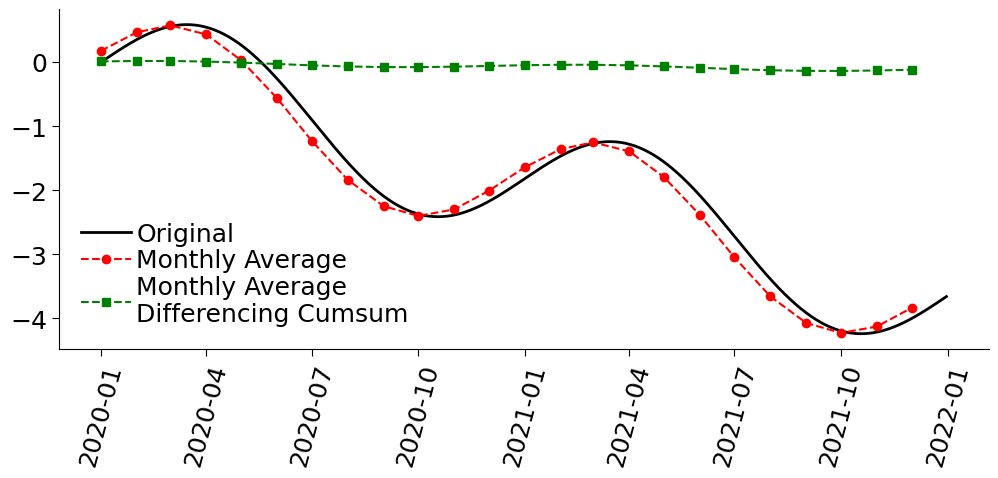

In [2]:
timeseries_arr = modeling.synthetic_daily_signal(
    start_date="2020-1-1", end_date="2021-12-31", linear_slope=-0.005, variance=0.0
)

monthly_average = timeseries_arr.resample("MS").mean()

differencing_ts = timeseries_arr.diff(1)
monthly_average_differencing = differencing_ts.resample("MS").mean()
monthly_average_differencing_cumsum = monthly_average_differencing.cumsum()

fig, ax = plt.subplots(1, 1, figsize=(12, 5))
ax.plot(timeseries_arr, color="black", lw=2, label="Original")
# ax.plot(differencing_ts.cumsum(), color='blue')
ax.plot(monthly_average, color="red", marker="o", linestyle="--", label="Monthly Average")
ax.plot(
    monthly_average_differencing_cumsum,
    color="green",
    marker="s",
    linestyle="--",
    label="Monthly Average\nDifferencing Cumsum",
)


visualize.configure_axis(ax, hide_spines=["right", "top"], tick_direction="out")
visualize.configure_legend(ax=ax)
fig.autofmt_xdate(ha="center", rotation=75)
plt.show()

#### Case 2

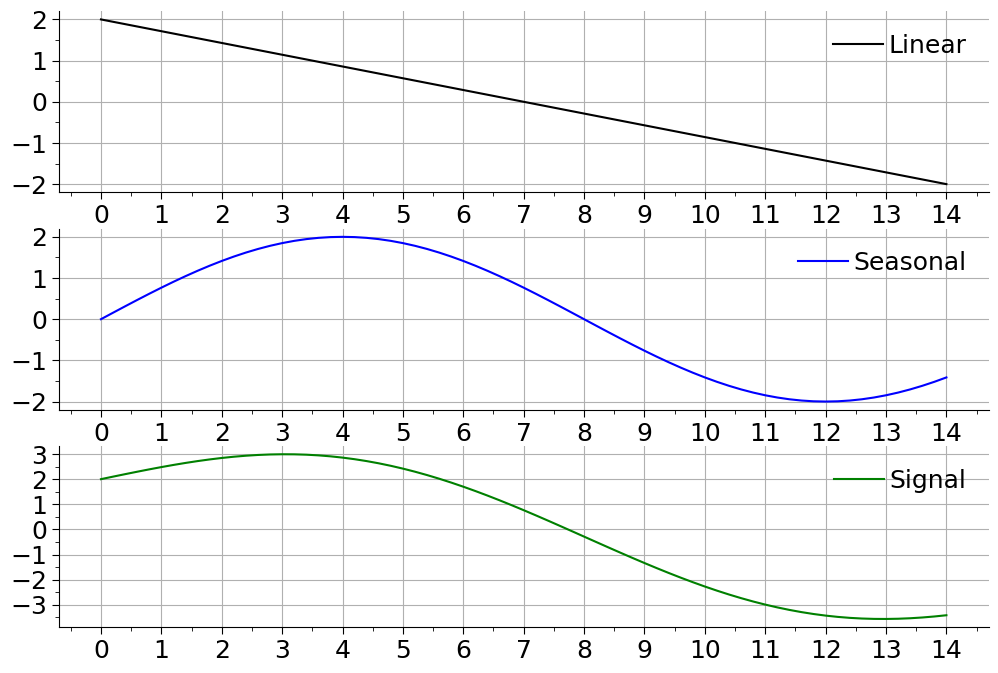

In [10]:
x = np.arange(start=0, stop=14.2, step=0.2)

f = lambda x: 2 - (2 / 7) * x
g = lambda x: 2 * np.sin(2 * np.pi * x / 16)
k = lambda x: f(x) + g(x)

fig, axes = plt.subplots(3, 1, figsize=(12, 8))

axes = axes.flatten()

axes[0].plot(x, f(x), color="black", label="Linear")
axes[1].plot(x, g(x), color="blue", label="Seasonal")
axes[2].plot(x, k(x), color='green', label="Signal")

for ax in axes:
    visualize.configure_ticks(ax=ax, x_major_interval=1, y_major_interval=1, x_minor_interval=0.5, y_minor_interval=0.5)
    visualize.configure_axis(ax=ax, hide_spines=["right", "top"], tick_direction="out")
    visualize.configure_legend(ax=ax)
    ax.grid(which="major", axis="both")

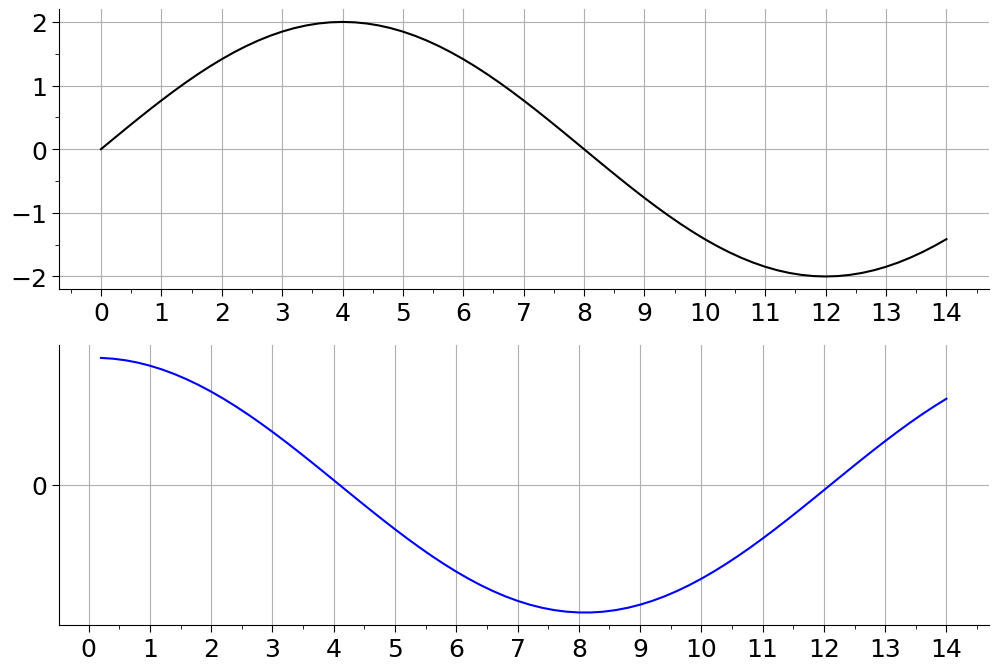

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes = axes.flatten()

axes[0].plot(x, g(x), color="black")
axes[1].plot(x[1:], np.diff(g(x), 1), color="blue")

for ax in axes:
    visualize.configure_ticks(ax=ax, x_major_interval=1, y_major_interval=1, x_minor_interval=0.5, y_minor_interval=0.5)
    visualize.configure_axis(ax=ax, hide_spines=["right", "top"], tick_direction="out")
    visualize.configure_legend(ax=ax)
    ax.grid(which="major", axis="both")